In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.patches as mpatches

In [2]:
data, test, train, movies = pd.read_csv("data/data.csv"), pd.read_csv("data/test.csv"), pd.read_csv("data/train.csv"), pd.read_csv("data/movies.csv")


In [3]:
def get_uv(file_u, file_v):
    U, V = np.load(file_u), np.load(file_v)

    V_offsets = np.array([
        np.average(row) 
        for row in V
    ])

    V_mc = np.array([
        row - V_offsets[i]
        for i, row in enumerate(V)
    ])

    U_mc = np.array([
        row - V_offsets[i]
        for i, row in enumerate(U)
    ])

    V_A, V_E, V_B = np.linalg.svd(V_mc)
    V_A12 = V_A[:,:2]
    V_proj = V_A12.T @ V_mc
    U_proj = V_A12.T @ U_mc
    U_pn = np.array([
        row / np.var(row)
        for row in U_proj
    ])

    V_pn = np.array([
        row / np.var(row)
        for row in V_proj
    ])
    
    return U_pn, V_pn

In [4]:
def gen_rating_splot(method, V):
    ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").mean()
    plt.figure(figsize=(10,8))
    cm = plt.cm.get_cmap('RdYlBu')
    r_arr = ratings["Rating"].array
    sc = plt.scatter(V[0], V[1], c=r_arr, vmin=min(r_arr), vmax=max(r_arr), s=35, cmap=cm, alpha=0.7)
    cbar = plt.colorbar(sc)
    cbar.set_label("Average Rating")
    plt.title("Principal Components of all Films ({})".format(method))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()


In [5]:
def gen_star_sandler(method, V):
    star_trek_idx = np.array([222, 227, 228, 229, 230, 380, 449, 450]) - 1
    star_wars_idx = np.array([50, 172, 181]) - 1
    sandler_idx = np.array([41, 354, 577, 940, 763, 1209, 833]) - 1
    n_movies = V.shape[1]
    c = np.zeros(n_movies)
    for v, arr in enumerate([star_trek_idx, star_wars_idx, sandler_idx]):
        for idx in arr:
            c[idx] = v + 1

    color_map = ["pink", "blue", "red", "green"]
    label_map = ["Other", "Star Trek", "Star Wars", "Adam Sandler"]
    alpha_map = [0.15, 1, 1, 1]

    colors = [color_map[int(v)] for v in list(c)]
    alphas = [alpha_map[int(v)] for v in list(c)]
    labels = [label_map[int(v)] for v in list(c)]

    plt.figure(figsize=(8,8))
    plt.scatter(V[0], V[1], c=colors, s=35, alpha=alphas)
    plt.title("Highlighted Movie Franchises ({})".format(method))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    plt.legend(handles=[
        mpatches.Patch(color=color, label=label, alpha=alpha)
        for color, label, alpha in zip(color_map, label_map, alpha_map)
    ])
    
#     for idx in list(star_trek_idx) + list(star_wars_idx)+ list(sandler_idx):
#         txt = str(movies.iloc[idx]["Movie Title"])
#         plt.text(V[0][idx], V[1][idx], txt)

    plt.show()

In [26]:

abbreviations = {"Star Trek: The Motion Picture (1979)":"ST 1",
"Star Trek: The Wrath of Khan (1982)":"ST 2",
"Star Trek III: The Search for Spock (1984)":"ST 3",
"Star Trek IV: The Voyage Home (1986)":"ST 4",
"Star Trek V: The Final Frontier (1989)":"ST 5",
"Star Trek VI: The Undiscovered Country (1991)":"ST 6",
"Star Trek: Generations (1994)":"ST 7",
"Star Trek: First Contact (1996)":"ST 8",
"Star Wars (1977)":"SW 4",
"Empire Strikes Back, The (1980)":"SW 5",
"Return of the Jedi (1983)":"SW 6",
"Billy Madison (1995)":"AS M",
"Wedding Singer, The (1998)":"AS W",
"Coneheads (1993)":"AS C",
"Airheads (1994)":"AS A",
"Happy Gilmore (1996)":"AS G",
"Mixed Nuts (1994)":"AS N",
"Bulletproof (1996)":"AS B"}


def gen_star_sandler_heat(method, V):
    star_trek_idx = np.array([222, 227, 228, 229, 230, 380, 449, 450]) - 1
    star_wars_idx = np.array([50, 172, 181]) - 1
    sandler_idx = np.array([41, 354, 577, 940, 763, 1209, 833]) - 1
    
    ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").mean()
    plt.figure(figsize=(10,8))
    cm = plt.cm.get_cmap('RdYlBu')
    r_arr = ratings["Rating"].array
    
    
    n_movies = V.shape[1]
    c = np.zeros(n_movies)
    for v, arr in enumerate([star_trek_idx, star_wars_idx, sandler_idx]):
        for idx in arr:
            c[idx] = v + 1

    marker_map = [".", ">", "*", "X"]
    size_map = [30, 80, 80, 80]
    label_map = ["Other", "Star Trek", "Star Wars", "Adam Sandler"]
    alpha_map = [0.5, 1, 1, 1]

    markers = [marker_map[int(v)] for v in list(c)]
    sizes = [size_map[int(v)] for v in list(c)]
    alphas = [alpha_map[int(v)] for v in list(c)]
    labels = [label_map[int(v)] for v in list(c)]

    plt.figure(figsize=(10,10))
    sc = plt.scatter(V[0], V[1], c=r_arr, vmin=min(r_arr), 
                vmax=max(r_arr), s=sizes, cmap=cm, alpha=alphas, 
                )
    cbar = plt.colorbar(sc)
    cbar.set_label("Average Rating")
    plt.title("Highlighted Movie Franchises ({})".format(method))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

#     plt.legend(handles=[
#         mpatches.Patch(shape=shape, label=label, alpha=alpha)
#         for shape, label, alpha in zip(shape_map, label_map, alpha_map)
#     ])
    
    for idx in list(star_trek_idx) + list(star_wars_idx) + list(sandler_idx):
        txt = str(movies.iloc[idx]["Movie Title"])
        plt.text(V[0][idx], V[1][idx], abbreviations[txt])


    plt.savefig("./plots/n_movies_{}.png".format(method))
    plt.show()

<Figure size 720x576 with 0 Axes>

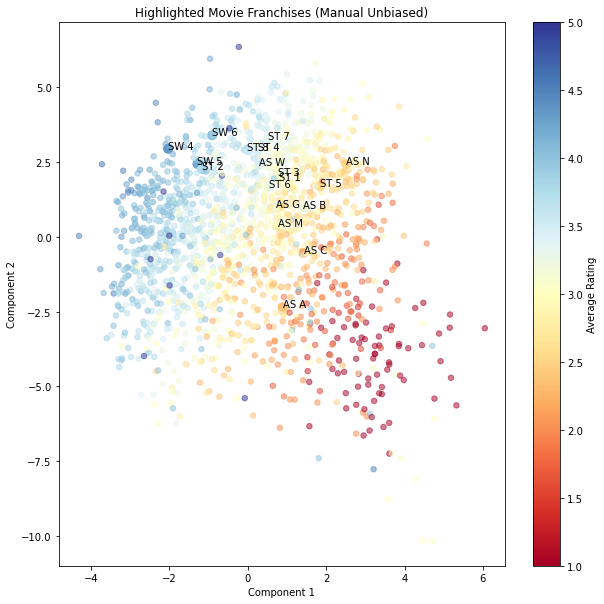

<Figure size 720x576 with 0 Axes>

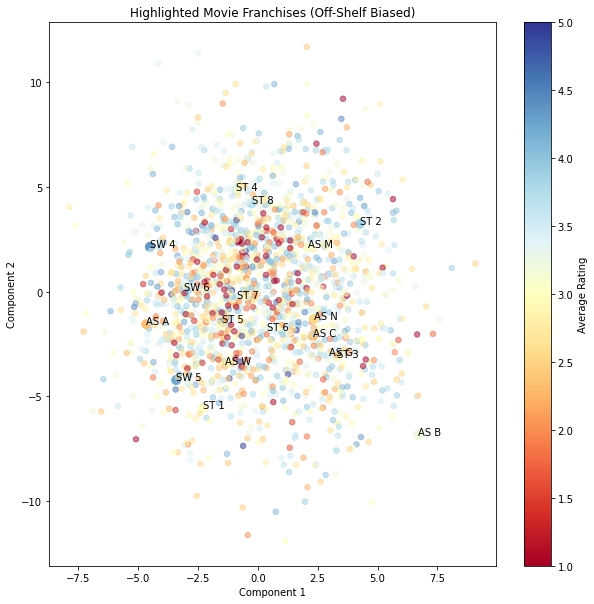

<Figure size 720x576 with 0 Axes>

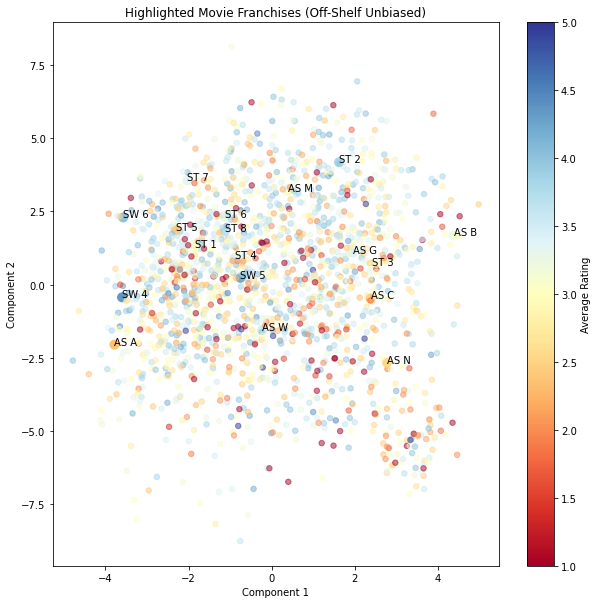

In [27]:
set5 = ('method1_U.npy', 'method1_V.npy')
biased = ("ots_bias_U2.npy", "ots_bias_V2.npy")
unbiased = ("ots_U2.npy", "ots_V2.npy")

params = [
    {
        "method":"Manual Unbiased",
        "files":set5
    },
    {
        "method":"Off-Shelf Biased",
        "files":biased
    },
    {
        "method":"Off-Shelf Unbiased",
        "files":unbiased
    }
]


for param in params:
    method, files = param["method"], param["files"]
    U, V = get_uv(files[0], files[1])
    gen_star_sandler_heat(method, V)
    
    

In [8]:
star_trek_idx = np.array([222, 227, 228, 229, 230, 380, 449, 450]) - 1
star_wars_idx = np.array([50, 172, 181]) - 1
sandler_idx = np.array([41, 354, 577, 940, 763, 1209, 833]) - 1

for idxgroup in [star_trek_idx, star_wars_idx, sandler_idx]:
    print(", ".join(list(movies.iloc[sorted(idxgroup)]["Movie Title"])), "\n")

Star Trek: First Contact (1996), Star Trek VI: The Undiscovered Country (1991), Star Trek: The Wrath of Khan (1982), Star Trek III: The Search for Spock (1984), Star Trek IV: The Voyage Home (1986), Star Trek: Generations (1994), Star Trek: The Motion Picture (1979), Star Trek V: The Final Frontier (1989) 

Star Wars (1977), Empire Strikes Back, The (1980), Return of the Jedi (1983) 

Billy Madison (1995), Wedding Singer, The (1998), Coneheads (1993), Happy Gilmore (1996), Bulletproof (1996), Airheads (1994), Mixed Nuts (1994) 



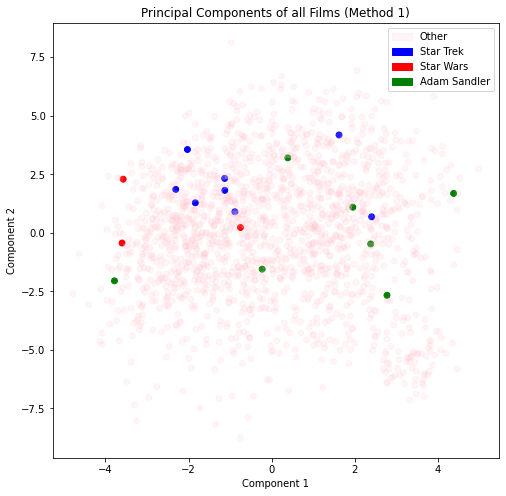

In [9]:
star_trek_idx = np.array([222, 227, 228, 229, 230, 380, 449, 450]) - 1
star_wars_idx = np.array([50, 172, 181]) - 1
sandler_idx = np.array([41, 354, 577, 940, 763, 1209, 833]) - 1
n_movies = V.shape[1]
c = np.zeros(n_movies)
for v, arr in enumerate([star_trek_idx, star_wars_idx, sandler_idx]):
    for idx in arr:
        c[idx] = v + 1
        
color_map = ["pink", "blue", "red", "green"]
label_map = ["Other", "Most Popular", "Star Wars", "Adam Sandler"]
alpha_map = [0.15, 1]

colors = [color_map[int(v)] for v in list(c)]
alphas = [alpha_map[int(v)] for v in list(c)]
labels = [label_map[int(v)] for v in list(c)]
        
plt.figure(figsize=(8,8))
plt.scatter(V[0], V[1], c=colors, s=35, alpha=alphas)
plt.title("Principal Components of all Films (Method 1)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.legend(handles=[
    mpatches.Patch(color=color, label=label, alpha=alpha)
    for color, label, alpha in zip(color_map, label_map, alpha_map)
])

plt.show()

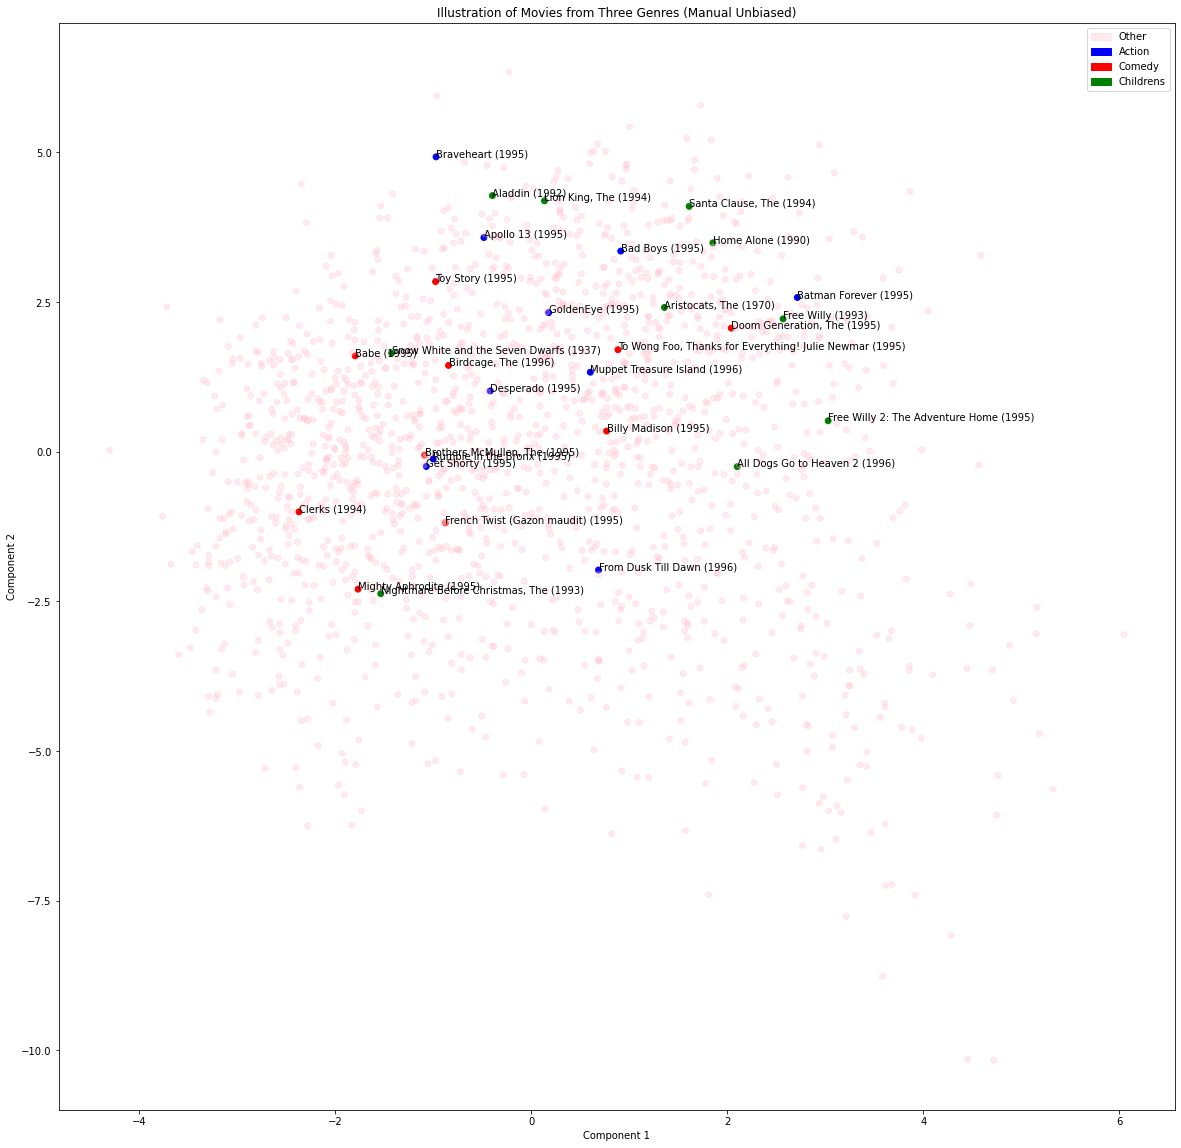

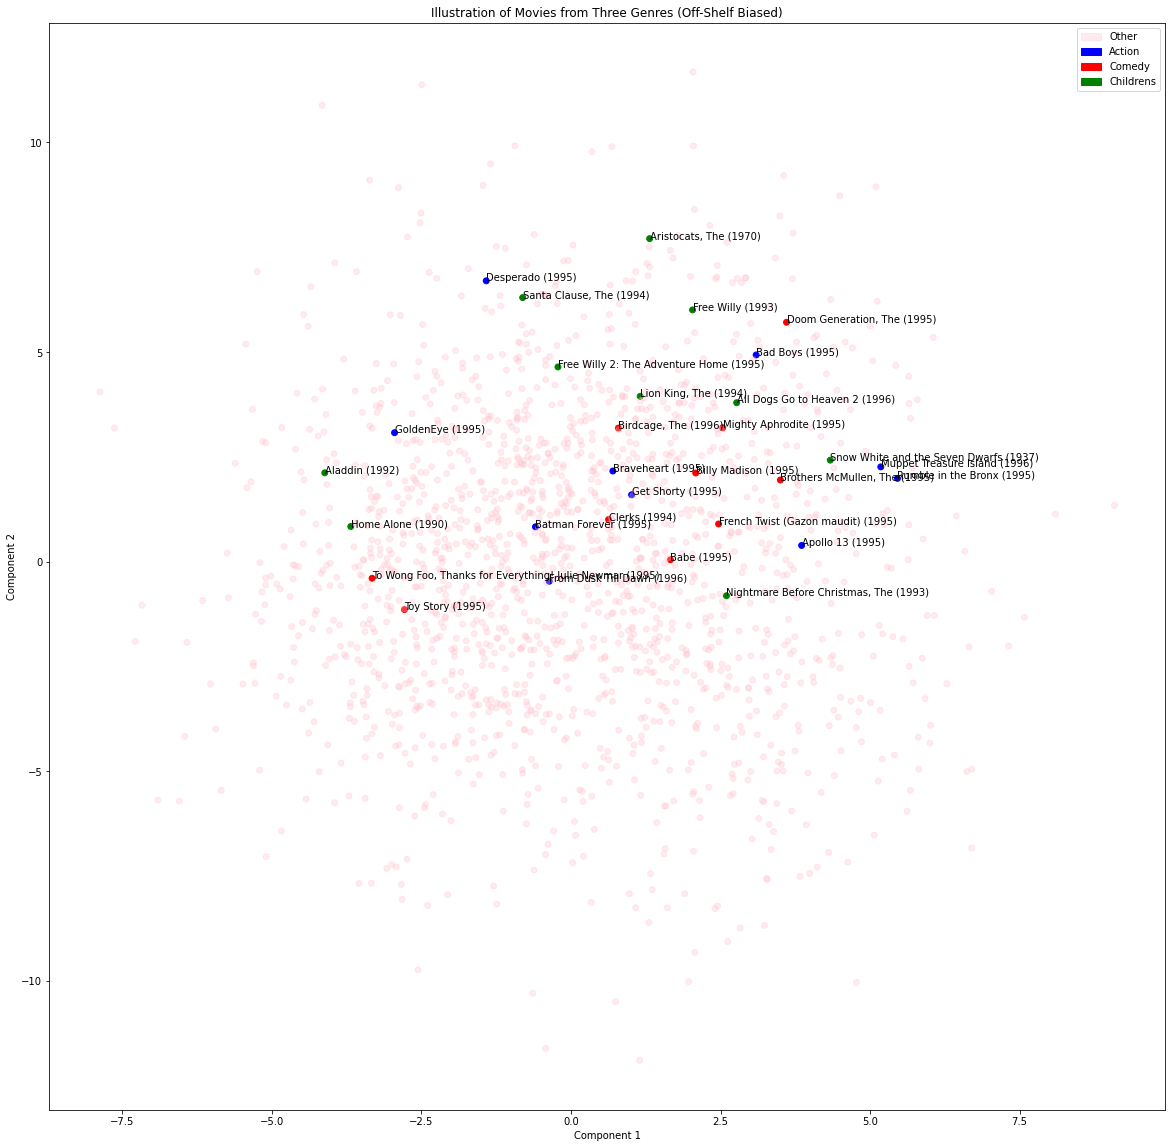

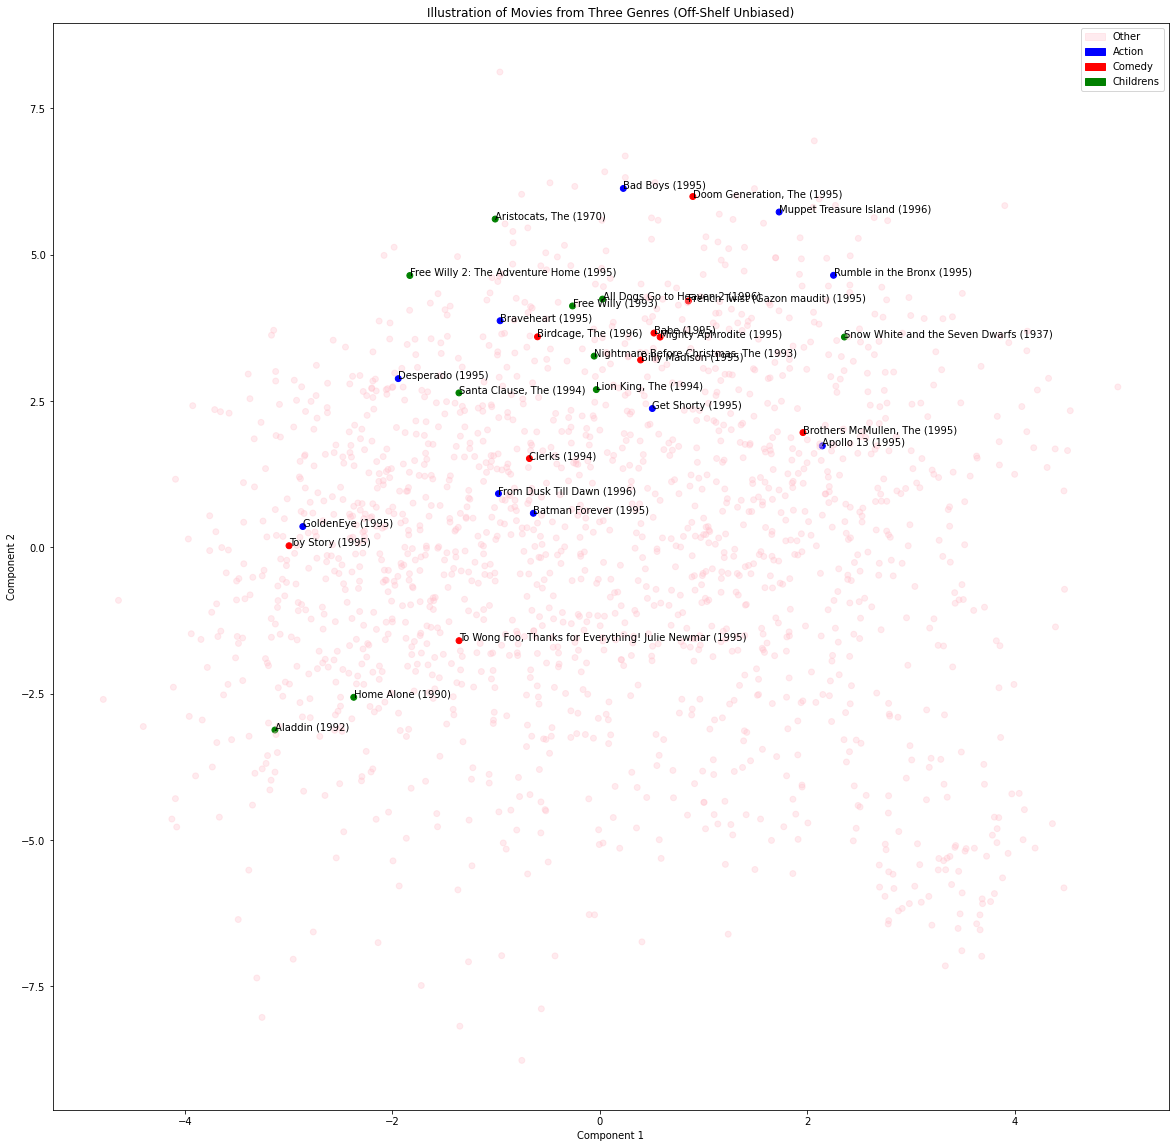

In [25]:
def gen_genre_plt(method, V):
    genres = ["Action", "Comedy", "Childrens"]
    idxs = []

    all_idxs = []

    for genre in genres:
        ids_in_genre = np.array(movies[movies[genre] == 1]["Movie ID"])
        idxs_in_genre = ids_in_genre - 1

        d = []
        for idx in idxs_in_genre:
            if idx not in all_idxs:
                d.append(idx)

        idxs.append(d[:10])
        all_idxs += d[:10]


    n_movies = V.shape[1]
    c = np.zeros(n_movies)
    for v, arr in enumerate(idxs):
        for idx in arr:
            c[idx] = v + 1

    color_map = ["pink", "blue", "red", "green"]
    label_map = ["Other"] + genres
    alpha_map = [0.3, 1, 1, 1]

    colors = [color_map[int(v)] for v in list(c)]
    alphas = [alpha_map[int(v)] for v in list(c)]
    labels = [label_map[int(v)] for v in list(c)]

    plt.figure(figsize=(20,20))
    plt.scatter(V[0], V[1], c=colors, s=35, alpha=alphas)
    plt.title("Illustration of Movies from Three Genres ({})".format(method))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    plt.legend(handles=[
        mpatches.Patch(color=color, label=label, alpha=alpha)
        for color, label, alpha in zip(color_map, label_map, alpha_map)
    ])


    for idx in all_idxs:
        txt = str(movies.iloc[idx]["Movie Title"])
        plt.text(V[0][idx], V[1][idx], txt)


    plt.savefig("./plots/genre_{}.png".format(method))
    plt.show()


for param in params:
    method, files = param["method"], param["files"]
    U, V = get_uv(files[0], files[1])
    gen_genre_plt(method, V)


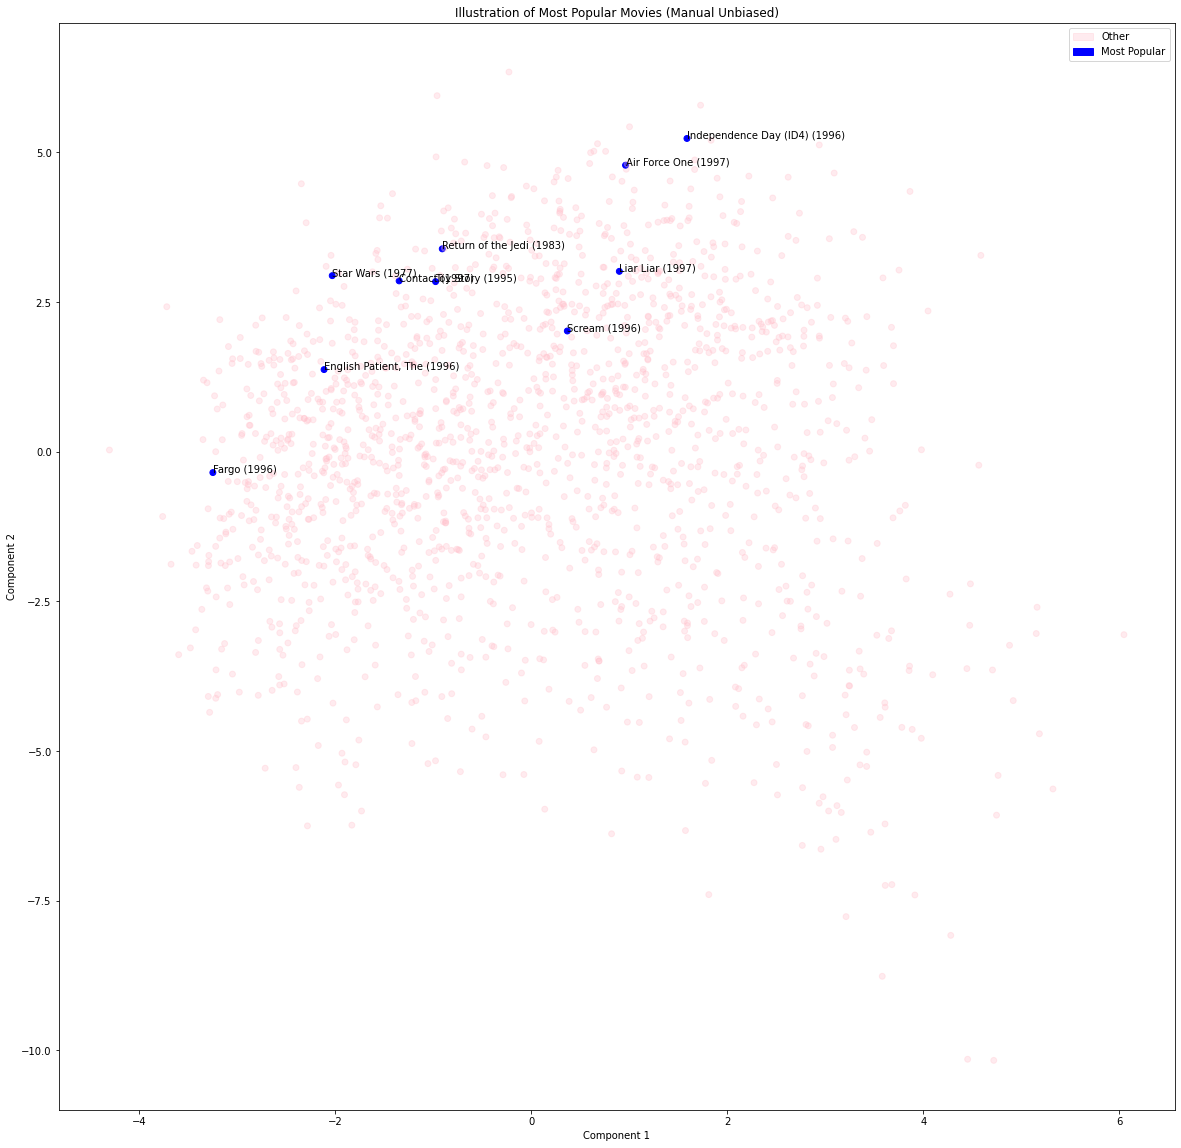

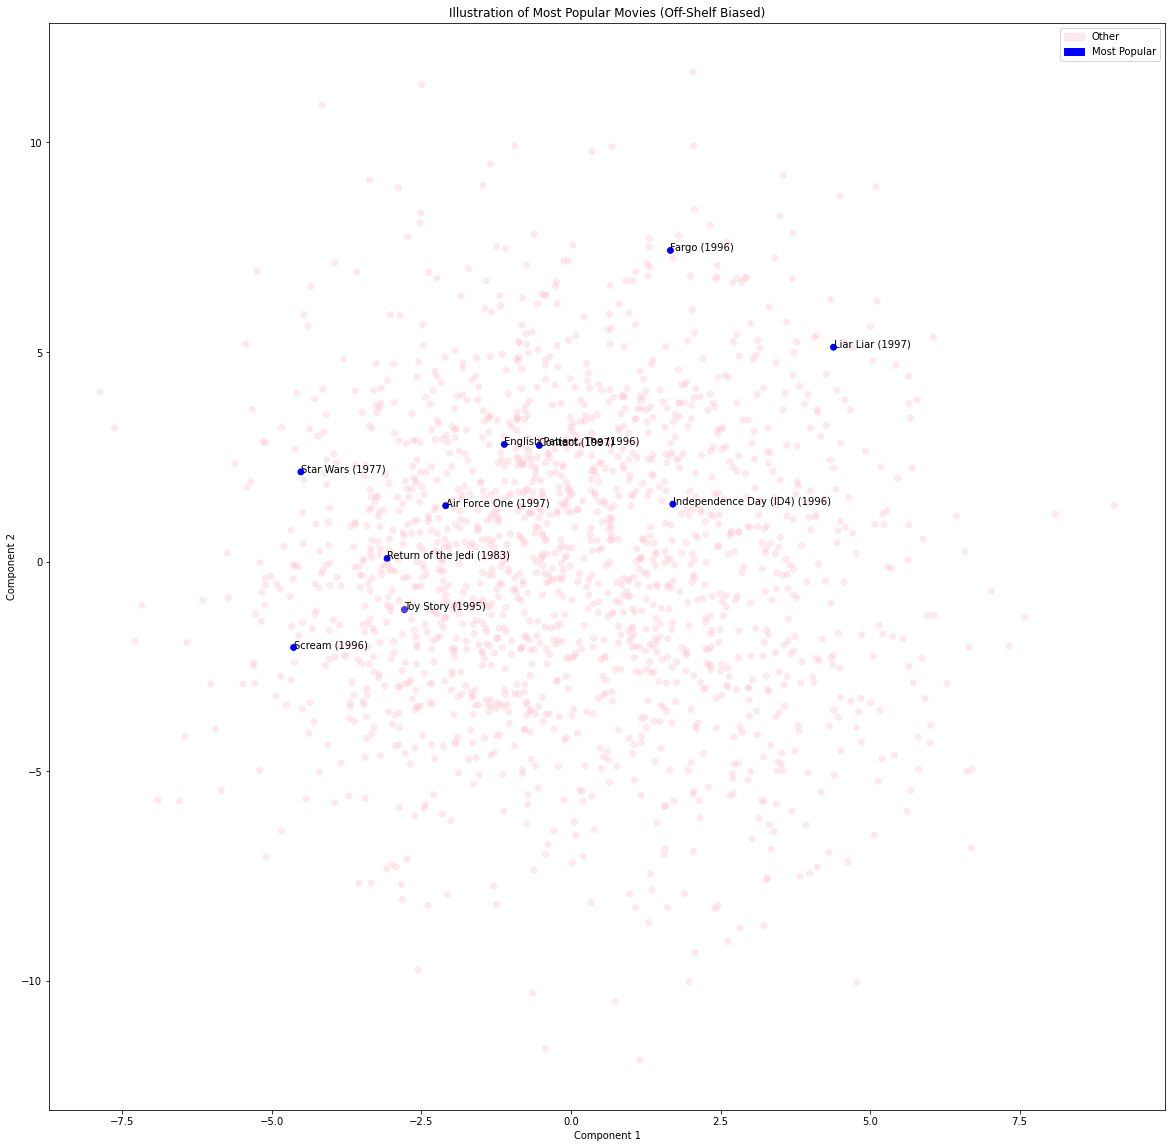

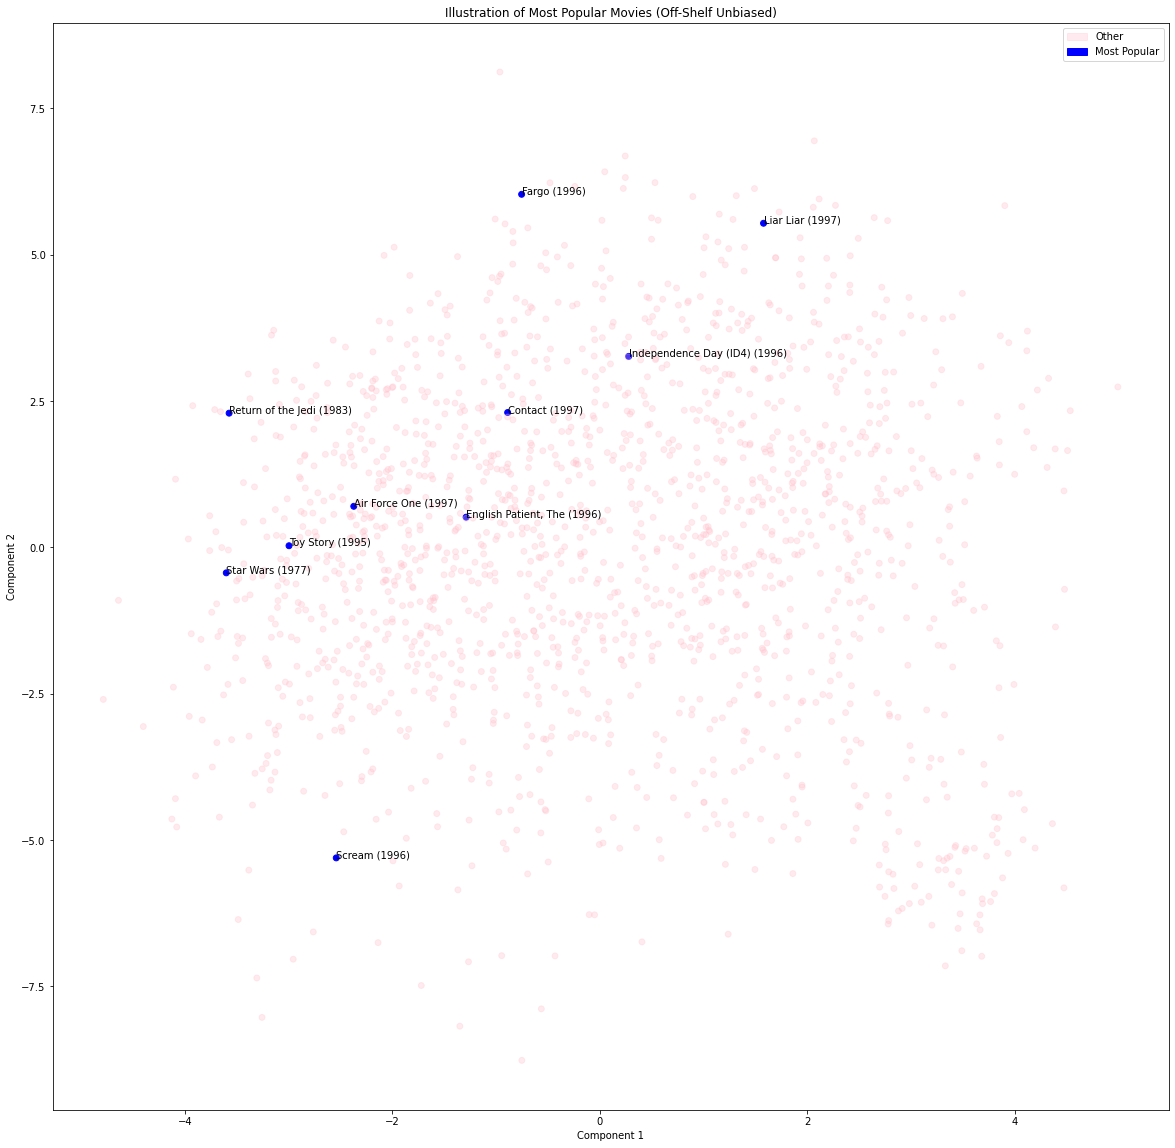

In [37]:
def gen_popular_plt(method, V):
    ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").count().rename(columns={"Rating":"Count"})
    s = ratings.sort_values("Count")
    popular_10_movies = np.array(s[-10:].index.array)
    popular_10_idxs = popular_10_movies - 1

    n_movies = V.shape[1]
    c = np.zeros(n_movies)
    for idx in popular_10_idxs:
        c[idx] = v + 1

    color_map = ["pink", "blue"]
    label_map = ["Other", "Most Popular"]
    alpha_map = [0.3, 1]

    colors = [color_map[int(v)] for v in list(c)]
    alphas = [alpha_map[int(v)] for v in list(c)]
    labels = [label_map[int(v)] for v in list(c)]

    plt.figure(figsize=(20,20))
    plt.scatter(V[0], V[1], c=colors, s=35, alpha=alphas)
    plt.title("Illustration of Most Popular Movies ({})".format(method))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    plt.legend(handles=[
        mpatches.Patch(color=color, label=label, alpha=alpha)
        for color, label, alpha in zip(color_map, label_map, alpha_map)
    ])


    for idx in popular_10_idxs:
        txt = str(movies.iloc[idx]["Movie Title"])
        plt.text(V[0][idx], V[1][idx], txt)
        
    plt.savefig("./plots/popular_{}.png".format(method))
    plt.show()
    
    

for param in params:
    method, files = param["method"], param["files"]
    U, V = get_uv(files[0], files[1])
    gen_popular_plt(method, V)



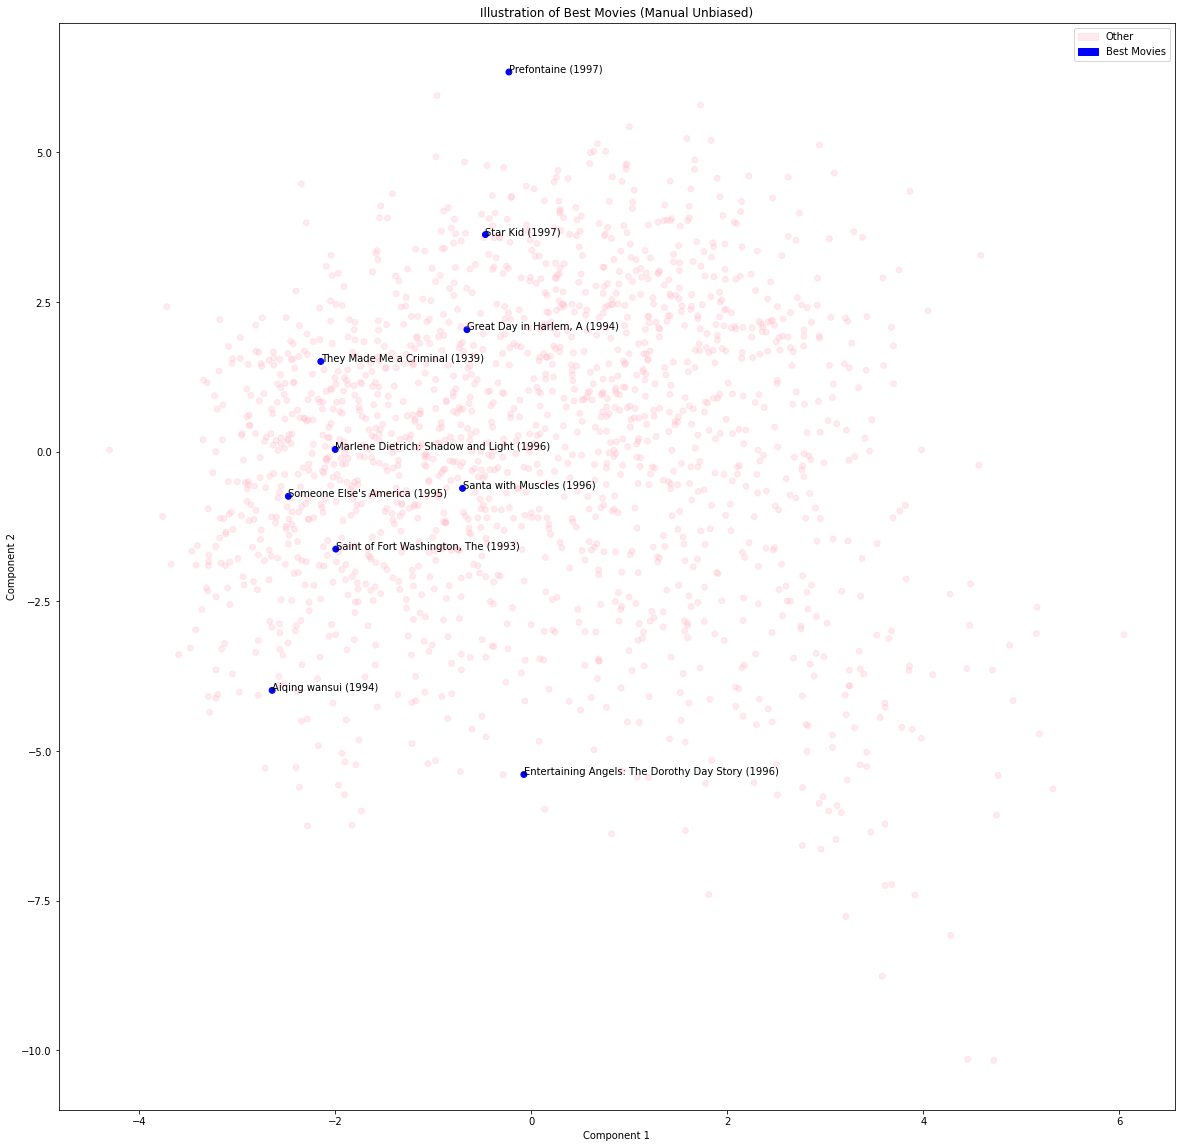

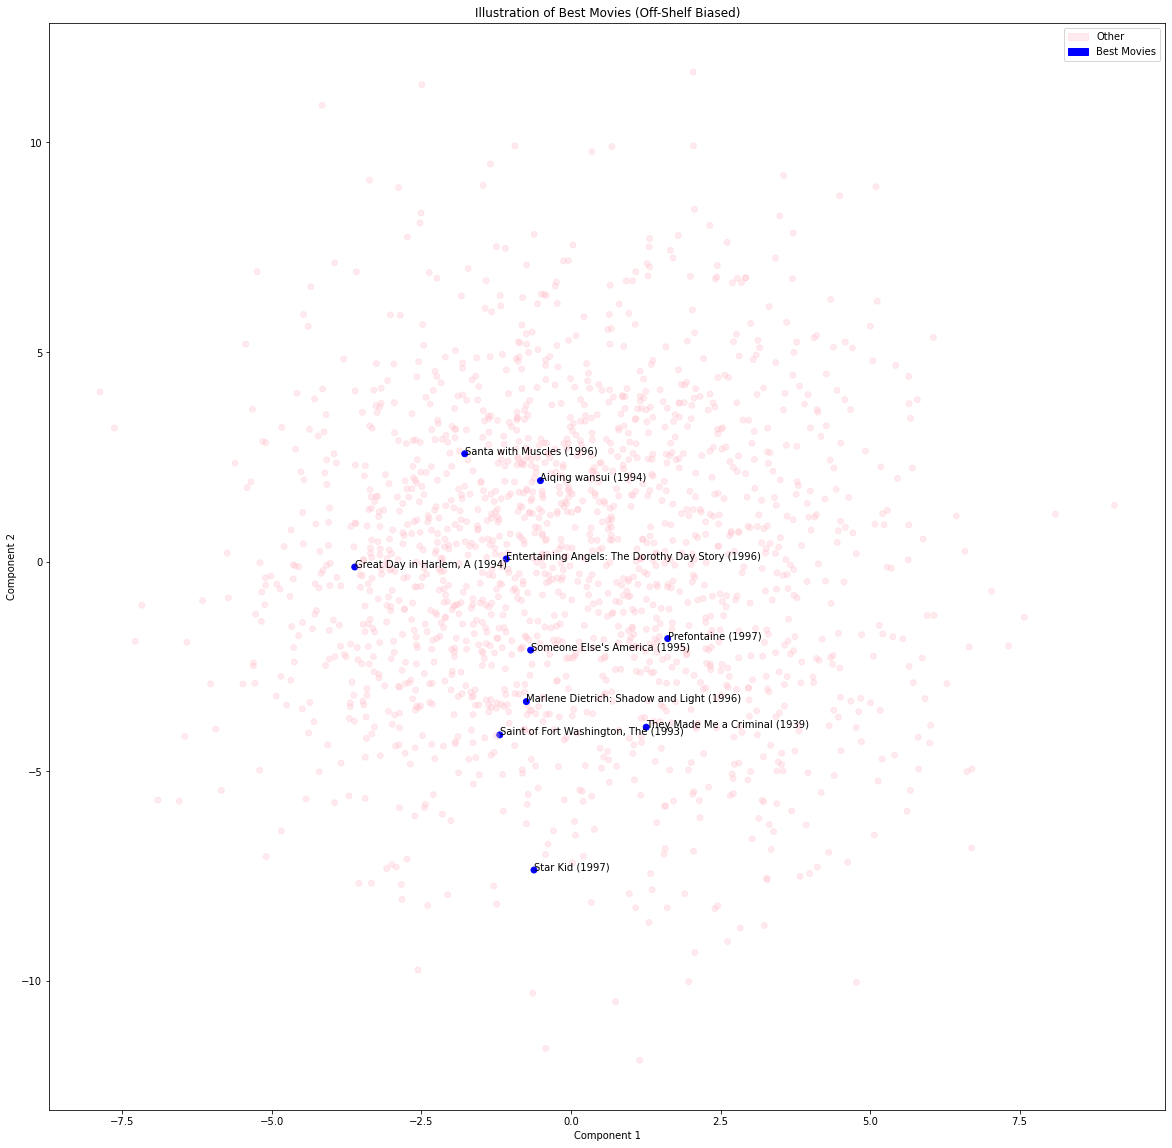

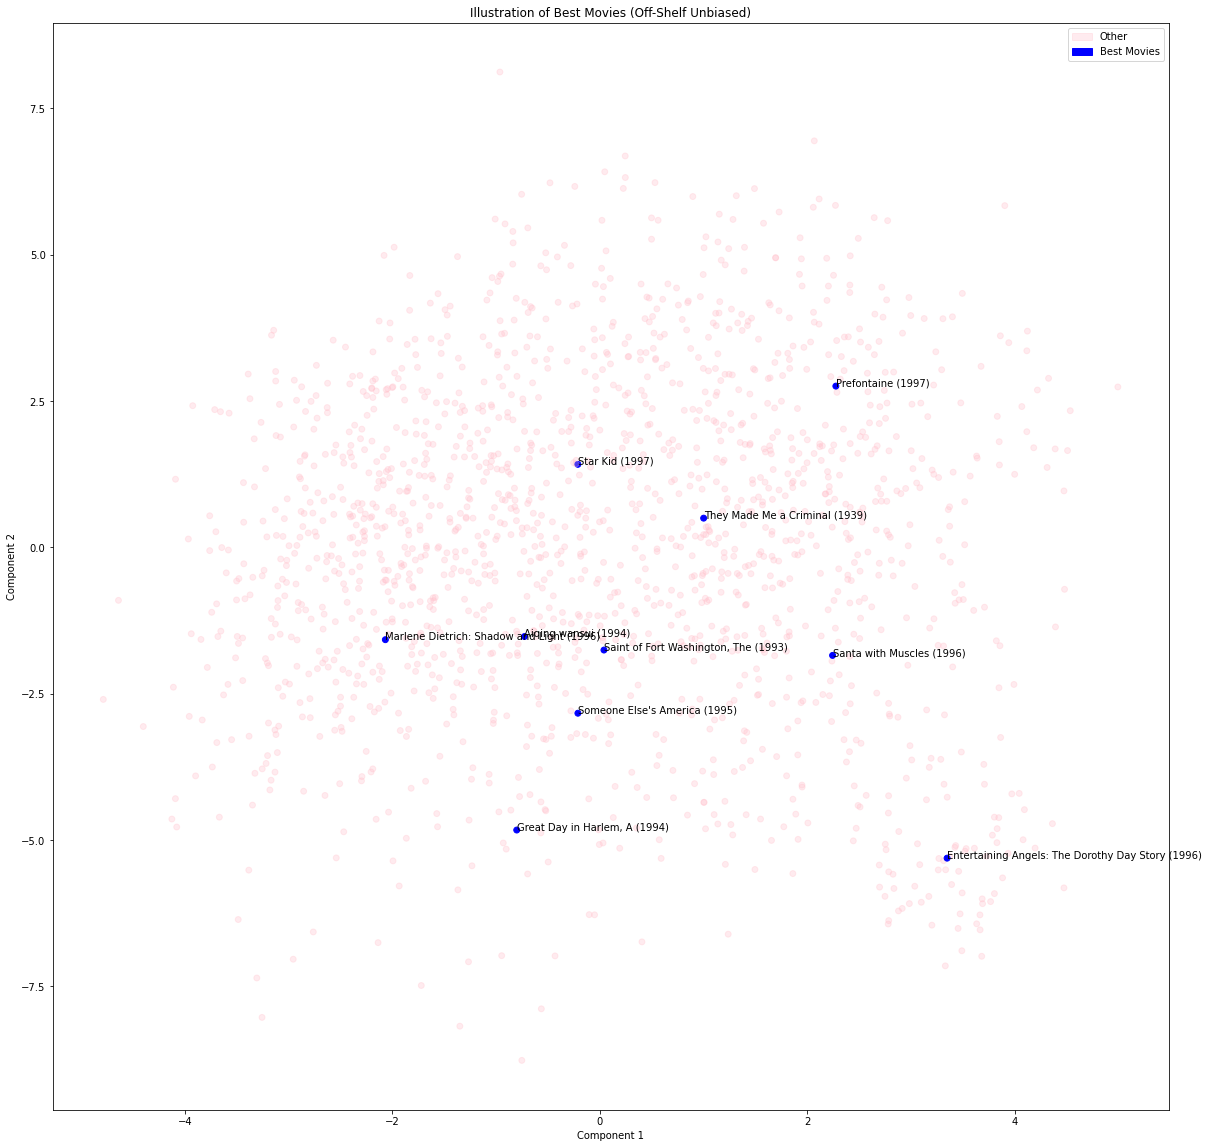

In [38]:
def gen_best_plt(method, V):
    ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").mean()
    s = ratings.sort_values("Rating")
    best_10_movies = s[-10:].index.array
    
    
    best_10_idxs = best_10_movies - 1

    n_movies = V.shape[1]
    c = np.zeros(n_movies)
    for idx in best_10_idxs:
        c[idx] = v + 1

    color_map = ["pink", "blue"]
    label_map = ["Other", "Best Movies"]
    alpha_map = [0.3, 1]

    colors = [color_map[int(v)] for v in list(c)]
    alphas = [alpha_map[int(v)] for v in list(c)]
    labels = [label_map[int(v)] for v in list(c)]

    plt.figure(figsize=(20,20))
    plt.scatter(V[0], V[1], c=colors, s=35, alpha=alphas)
    plt.title("Illustration of Best Movies ({})".format(method))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    plt.legend(handles=[
        mpatches.Patch(color=color, label=label, alpha=alpha)
        for color, label, alpha in zip(color_map, label_map, alpha_map)
    ])


    for idx in best_10_idxs:
        txt = str(movies.iloc[idx]["Movie Title"])
        plt.text(V[0][idx], V[1][idx], txt)
        
    plt.savefig("./plots/best_{}.png".format(method))
    plt.show()
    
    

for param in params:
    method, files = param["method"], param["files"]
    U, V = get_uv(files[0], files[1])
    gen_best_plt(method, V)


